In [1]:
import numpy as np 
import pandas as pd
from scipy.interpolate import UnivariateSpline 
import matplotlib.pyplot as plt
plt.style.use('sensitivity.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
pCDR = pd.read_csv('Data/pCDR.csv')
data = pd.read_csv('Data/chroma.csv')
g4_disagreement = np.array([1.199, 0.583, 0.813, 1.16, 0.74, 1.309, 1.111, 0.018, 0.008, 1.007, 1.817])

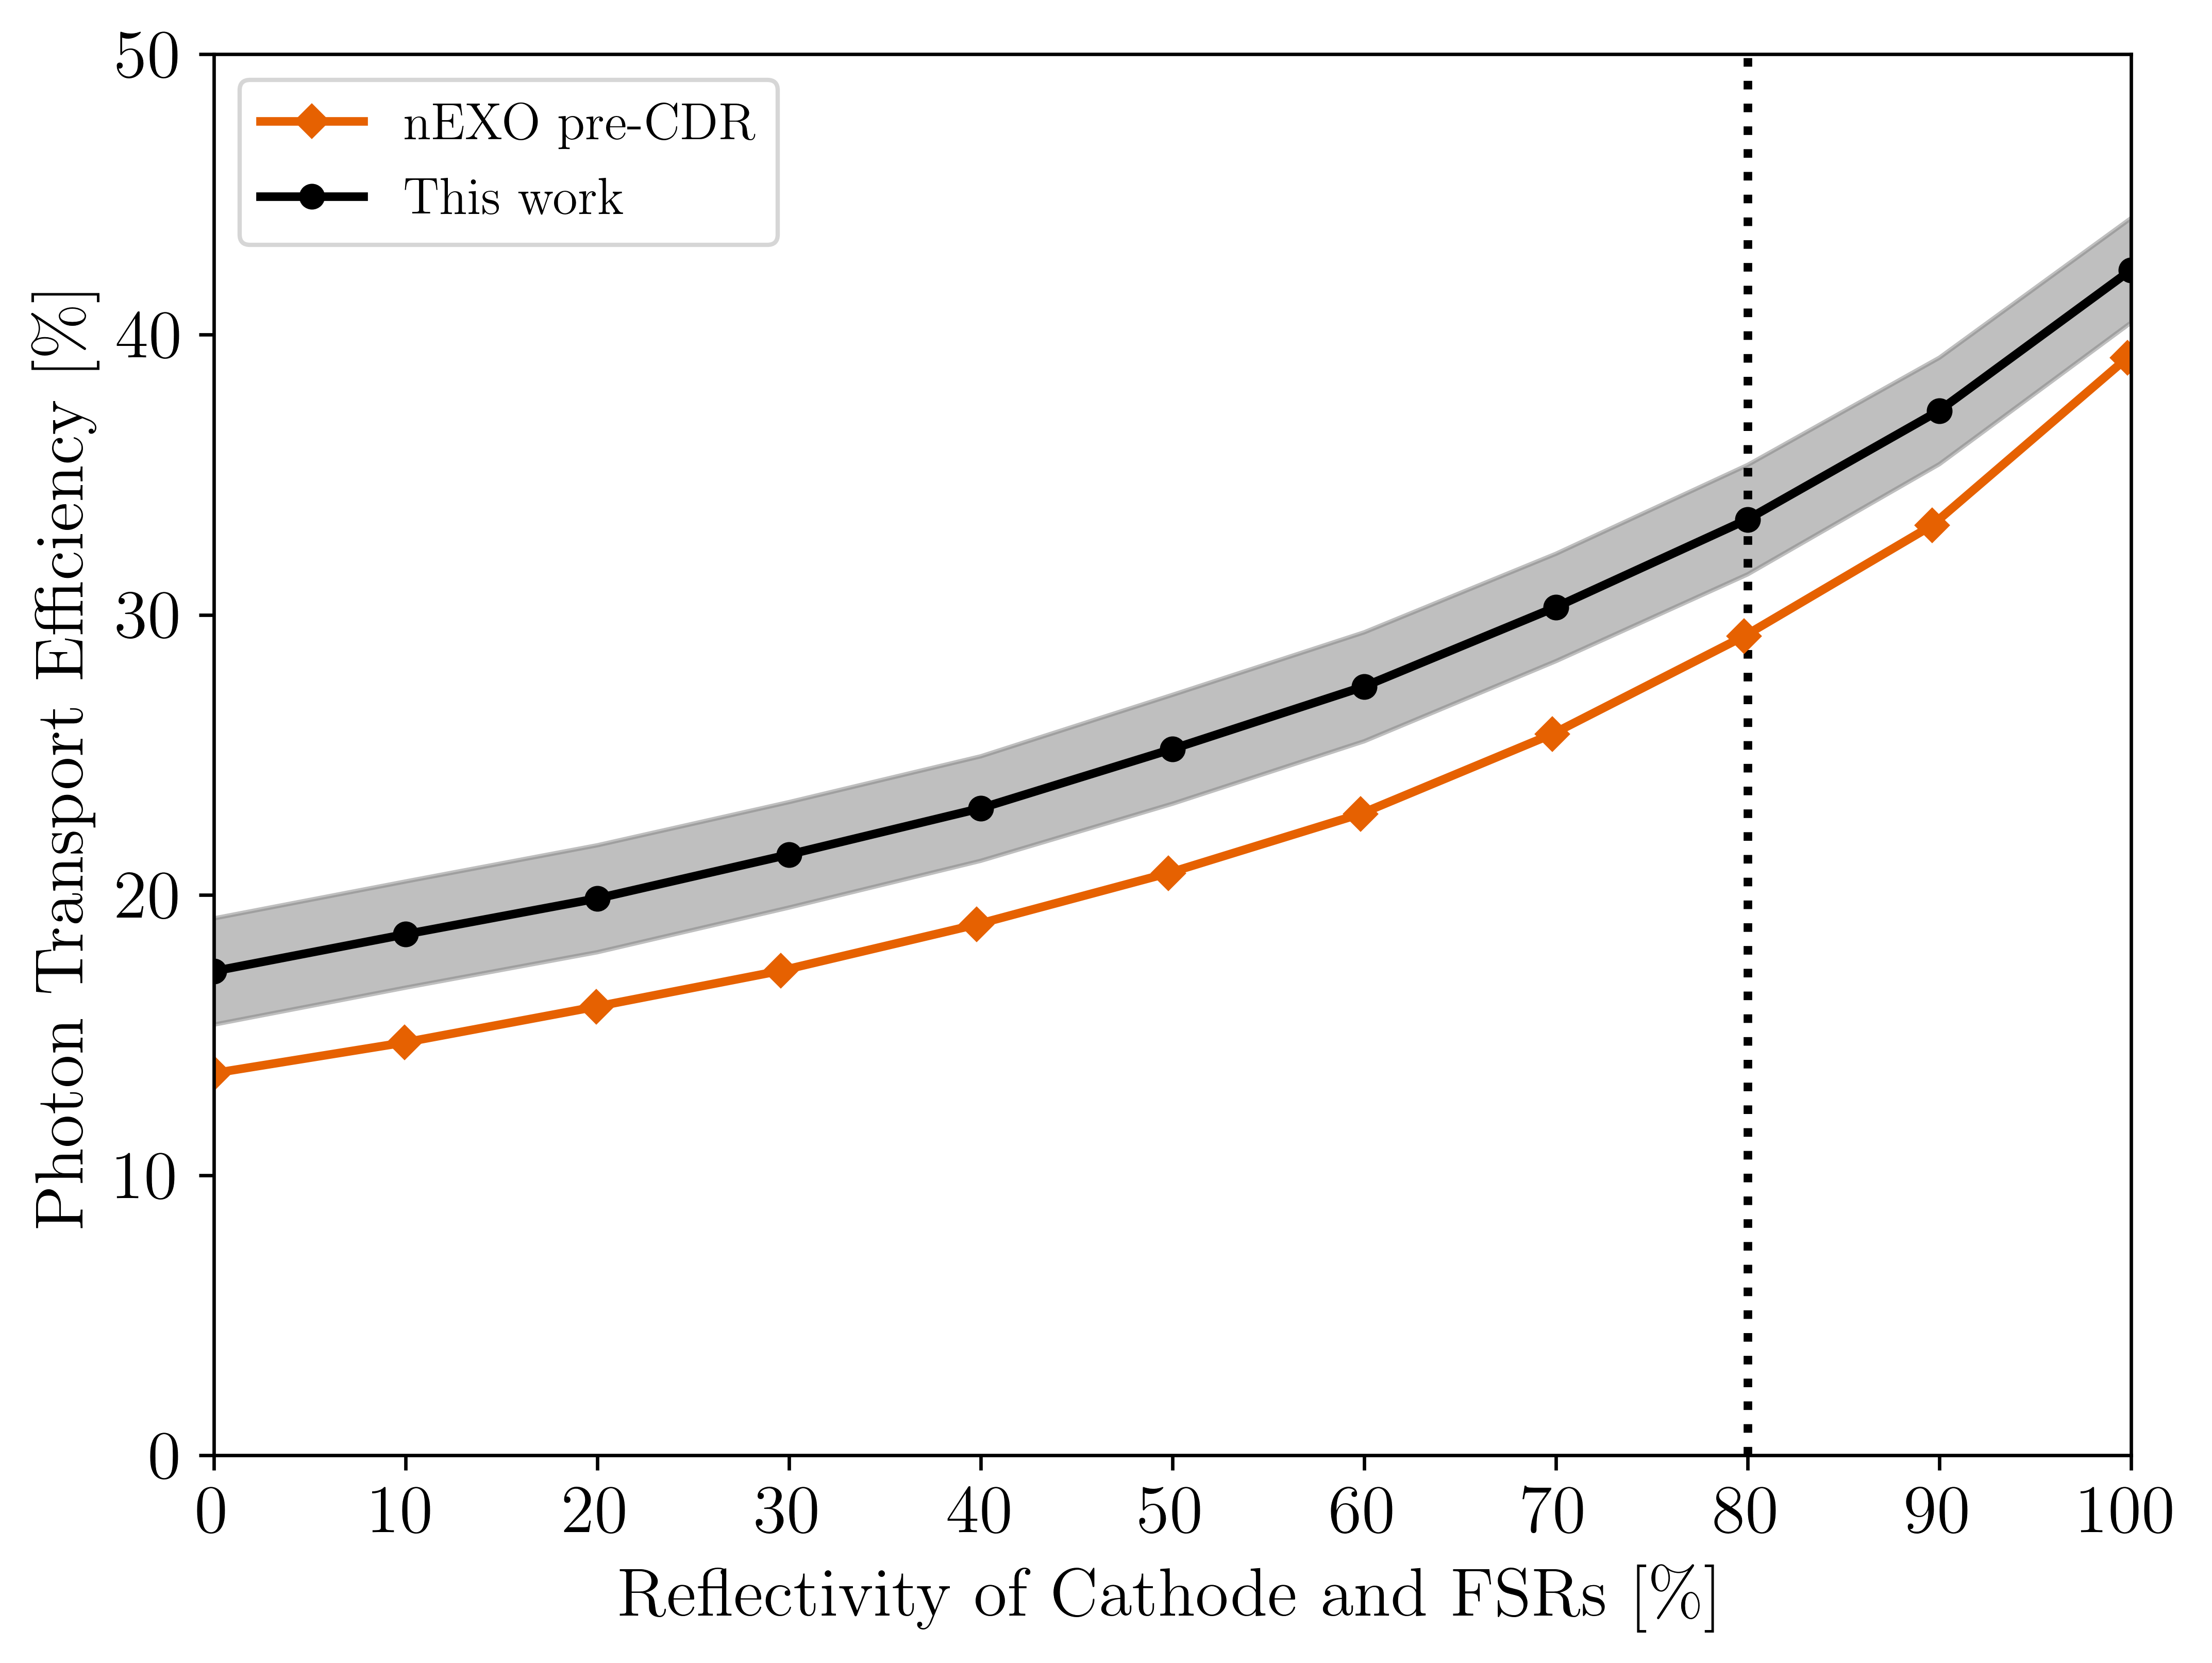

In [3]:
fig = plt.figure()
plt.xlim(0,100)
plt.ylim(0,50)
plt.xticks(np.linspace(0,100,11), fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'Reflectivity of Cathode and FSRs [$\%$]', fontsize=16)
plt.ylabel(r'Photon Transport Efficiency [$\%$]', fontsize=16)

eff = np.array([data['VUV4 Er - PTE'], data['VUV4 UA - PTE'], data['FBK Er - PTE']])
av = np.mean(eff, axis=0)
std = np.std(eff, axis=0)

err = np.sqrt(std**2 + np.max(g4_disagreement)**2)

plt.plot(pCDR['Reflectivity'], pCDR['PTE'],  markersize=5, color=colors[1], marker='D', label='nEXO pre-CDR')
plt.plot(data['Reflectivity'], av, markersize=5, color='k', marker='o', label='This work')
plt.fill_between(data['Reflectivity'], av-err, av+err, color='grey', alpha=0.5 , label='')
plt.vlines(x=80, ymin=0,ymax=50, ls=':', color='k')

plt.legend(loc='upper left')
plt.savefig('pte_vs_reflectivity.pdf')